In [1]:
# to do prediction on Internet Firewall Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to read in dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/internet+firewall+data/log2.csv')

In [4]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [5]:
# there are no missing values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
# to print the categories in 'Action' column
# A classification problem
df['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

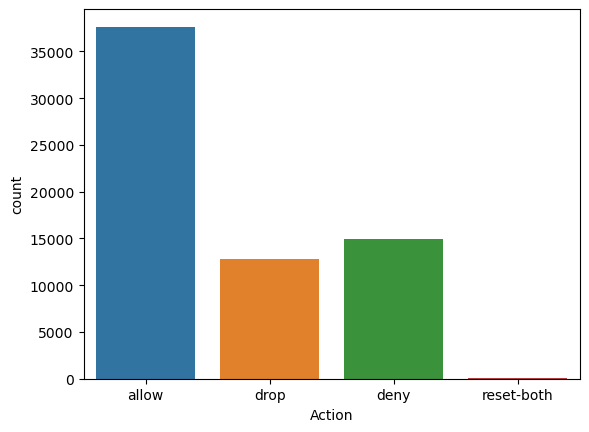

In [7]:
# target column 'Action' has 4 outcomes
sns.countplot(data=df, x='Action')
plt.show()

In [8]:
df['Action'].value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [9]:
# to use Decision Tree and Random Forest classification for prediction
X = df.drop('Action', axis=1)

In [10]:
y = df['Action']

In [11]:
# to import train test split
from sklearn.model_selection import train_test_split

In [12]:
# to scale dataset before Machine learning
from sklearn.preprocessing import StandardScaler

In [13]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

In [17]:
# to import decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()

In [19]:
# to fit the model to training data
dt.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [20]:
# to do decision tree prediction on testingset
dt_pred = dt.predict(scaled_X_test)

In [21]:
# to print the decision tree feature importance
dt.feature_importances_

array([2.14316145e-03, 3.64953341e-01, 0.00000000e+00, 4.05557775e-04,
       9.66773096e-04, 2.59218753e-04, 0.00000000e+00, 1.15275077e-02,
       6.19331020e-01, 3.13654002e-04, 9.97662199e-05])

In [22]:
# to convert Feature Importance values into a Dataframe
imp_feat = pd.DataFrame(index=X.columns, data=dt.feature_importances_, columns=['Feature Importance'])

In [23]:
imp_feat = imp_feat.sort_values('Feature Importance')

In [24]:
# top predictors for class: 'Action' is Elapsed Time (sec), Destination Port and Packets
imp_feat

,Feature Importance
NAT Source Port,0.000000
Bytes Received,0.000000
pkts_received,0.000100
Bytes Sent,0.000259
pkts_sent,0.000314
NAT Destination Port,0.000406
Bytes,0.000967
Source Port,0.002143
Packets,0.011528
Destination Port,0.364953


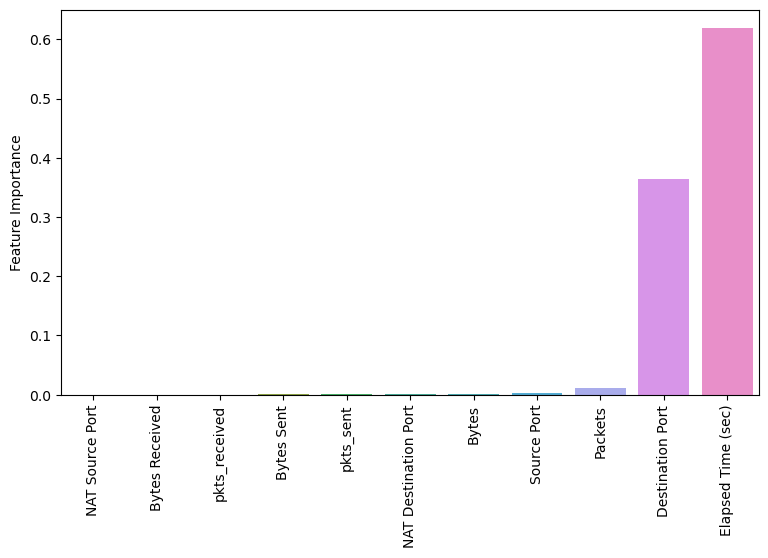

In [25]:
# to convert the feature importance plot into a plot
plt.figure(figsize=(9,5), dpi=100)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [26]:
# to import the performance evaluation metric
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# the decision tree model is 100% accuracy
print(confusion_matrix(y_test, dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[11331     6     0     0]
 [    4  4363    14     5]
 [    0     9  3916     0]
 [    0     5     0     7]]


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11337
        deny       1.00      0.99      1.00      4386
        drop       1.00      1.00      1.00      3925
  reset-both       0.58      0.58      0.58        12

    accuracy                           1.00     19660
   macro avg       0.89      0.89      0.89     19660
weighted avg       1.00      1.00      1.00     19660



In [28]:
# to import the Random Forest classifier algorithm
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier()

In [30]:
# to specify parameters for RF classifier
rfc = RandomForestClassifier(n_estimators = 50,
                            max_features = 'sqrt',
                            random_state =101)

In [31]:
# to fit the random forest model to training data
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=101)

In [32]:
# to do Random Forest predictions
rfc_pred = rfc.predict(scaled_X_test)

In [33]:
# to print out list of feature importance from RF classifier
rfc.feature_importances_

array([0.05559675, 0.23134831, 0.11361106, 0.17634203, 0.06751056,
       0.05207867, 0.03093716, 0.05945497, 0.13914535, 0.00137315,
       0.072602  ])

In [34]:
feat_import = rfc.feature_importances_

In [35]:
imp_feat = pd.DataFrame(index= X.columns,
                       data=feat_import,
                       columns=['Importance'])

In [36]:
# to print table of feature importance from Random Forest model
imp_feat

,Importance
Source Port,0.055597
Destination Port,0.231348
NAT Source Port,0.113611
NAT Destination Port,0.176342
Bytes,0.067511
Bytes Sent,0.052079
Bytes Received,0.030937
Packets,0.059455
Elapsed Time (sec),0.139145
pkts_sent,0.001373


In [37]:
# to sort the values from table
imp_feat = imp_feat.sort_values('Importance')

In [38]:
# sort values from RF model
imp_feat

,Importance
pkts_sent,0.001373
Bytes Received,0.030937
Bytes Sent,0.052079
Source Port,0.055597
Packets,0.059455
Bytes,0.067511
pkts_received,0.072602
NAT Source Port,0.113611
Elapsed Time (sec),0.139145
NAT Destination Port,0.176342


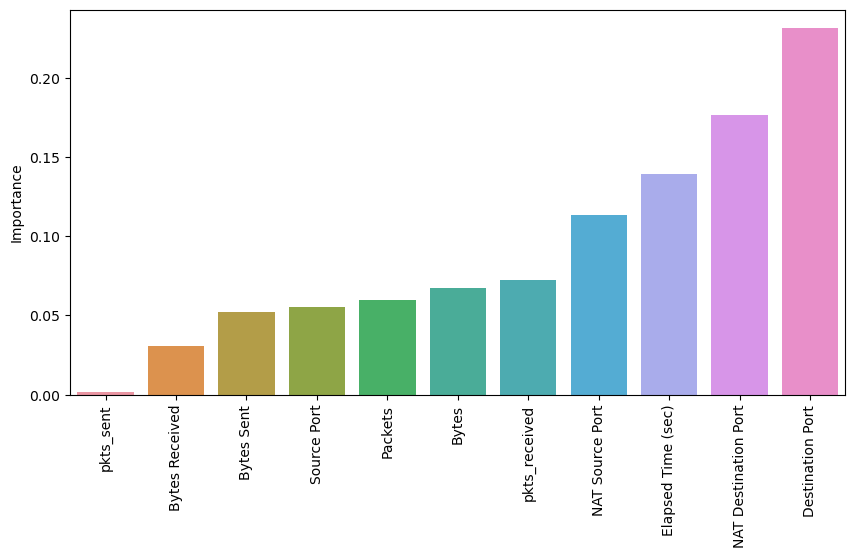

In [39]:
# to convert the RF feature importance table into a plot
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data = imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

In [40]:
# the Random Forest classifier model has 100% accuracy rate
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[11332     5     0     0]
 [    2  4370    14     0]
 [    0    11  3914     0]
 [    0    10     0     2]]


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11337
        deny       0.99      1.00      1.00      4386
        drop       1.00      1.00      1.00      3925
  reset-both       1.00      0.17      0.29        12

    accuracy                           1.00     19660
   macro avg       1.00      0.79      0.82     19660
weighted avg       1.00      1.00      1.00     19660



In [41]:
# to use Multi-Class Classification with Logistic Regression Cross Validation
from sklearn.linear_model import LogisticRegressionCV

In [42]:
# to build the logistic regression model
log_model = LogisticRegressionCV()

In [43]:
# to fit logistic model to training data
log_model.fit(scaled_X_train,y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

In [44]:
# to report back the C value that has the Best Fit based of the Cross-validation
log_model.C_

array([10000., 10000., 10000., 10000.])

In [45]:
# model parameters: to report back the parameters that it was fitted on the Cross Validation
# Cs = 10 different C values
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [46]:
logm_pred = log_model.predict(scaled_X_test)

In [47]:
# performance evaluation of mc logistic regression
confusion_matrix(y_test,logm_pred)

array([[11291,    45,     0,     1],
       [    4,  4243,   139,     0],
       [    0,     0,  3925,     0],
       [    2,    10,     0,     0]], dtype=int64)

In [48]:
# Multi class Logistic regression has 99% accuracy rate, RF is the best
print(classification_report(y_test,logm_pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11337
        deny       0.99      0.97      0.98      4386
        drop       0.97      1.00      0.98      3925
  reset-both       0.00      0.00      0.00        12

    accuracy                           0.99     19660
   macro avg       0.74      0.74      0.74     19660
weighted avg       0.99      0.99      0.99     19660



In [49]:
# The Random Forest classifier achieved 100% accuracy rate and should be deployed for use.